## Name: Andrew Caide

### CSCI S-89C Deep Reinforcement Learning  
### Part II of Assignment 11

# Preface

## DELETED TO SAVE SPACE

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import time
import pickle

from keras import layers
from keras import models
from keras.layers import Dropout

# Problem 1 (20 points)

In this problem we will develop a Q-learning algorithm for selecting the best treatment based on "medical" images. Each 128x128 image is a vector of 784 features: ${\bf x}=(x_1,x_2,\ldots,x_{784})^T$.

---

1. Please load the observations of features ${\bf x}(S_t)$, $t=0,1,\ldots$ ('images' variable), actions $A_t$, $t=0,1,\ldots$ ('actions' variable), and rewards $R_t$, $t=1,2,\ldots$ from the 'markov_decision_process.pkl' file. 

**NOTE:** Please notice that in each state $s\in \mathcal{S}$, the set of admissible actions is $\mathcal{A}(s)=\{0,1,2\}$. Here, "0" states for no treatment and "1" and "2" are two treatments of different types. We assume that this is a Markov Decision Process, that is, the joint distribution of the next state $S_{t+1}$ and reward $R_{t+1}$ depens on the pair of current state and action $(S_t, A_t)$ only.



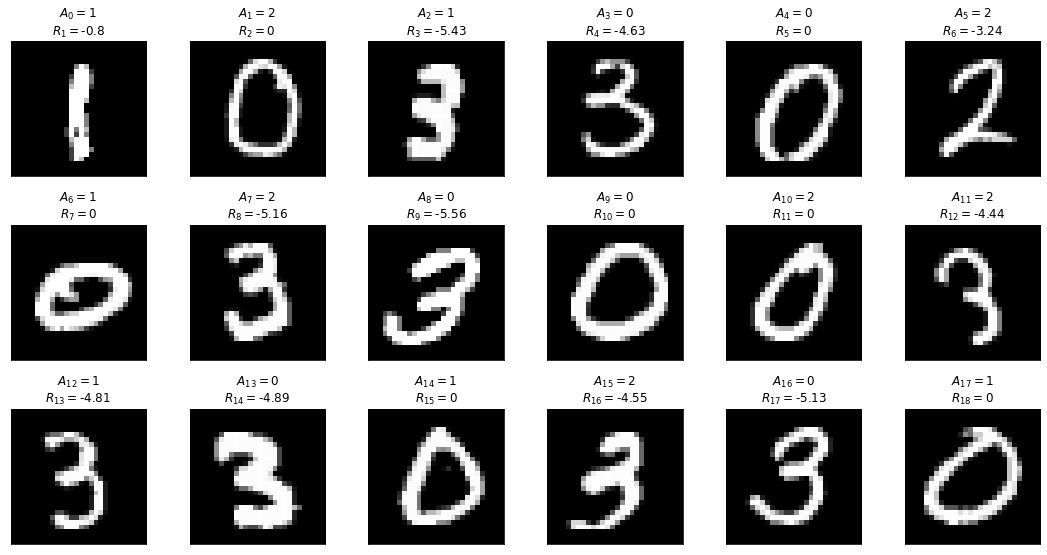

In [2]:
with open('markov_decision_process.pkl', 'rb') as f:
    images, actions, rewards = pickle.load(f)
    
    
k = 0
fig = plt.figure(figsize=(15,8))
for t in range(18):
    k += 1
    plt.subplot(3,6,k)
    plt.tight_layout()
    plt.imshow(images[t], cmap='gray', interpolation='none')
    plt.title("$A_{" + str(t) + "}=$"+str(actions[t])+"\n$R_{" + str(t+1) + "}=$"+str(round(rewards[t],2)))
    plt.xticks([])
    plt.yticks([])
    
#plt.show()

In [3]:
actions_1hot = pd.get_dummies(actions)
ims = images.reshape(-1, 784).astype('float32')
ims /= 255
print("Image shape: {}.".format(ims.shape))


X = np.concatenate((ims, np.array(actions_1hot)), axis = 1)
print("Input shape {}".format(X.shape))

Image shape: (50000, 784).
Input shape (50000, 787)


In [4]:
X_A0 = X.copy()
X_A1 = X.copy()
X_A2 = X.copy()
# ---

X_A0[:,784:787] = 0
X_A1[:,784:787] = 0
X_A2[:,784:787] = 0

X_A0[:,784] = 1
X_A1[:,785] = 1
X_A2[:,786] = 1

---
2. Develop a Q-learning algorithm with approximation via a Deep Neural Network (NN).   
a. Use the vector of fetures ${\bf x}(S_t)$ and representations of actions ${\bf y}(A_t)$ (one-hot encodings) as an input to the NN. The output of the NN should be the corresponding action-value $\hat{q}(S_t,A_t,{\bf w})$.   
b. Feel free to use either feedforward fully connected NN or Convolutional NN.

In [5]:
#Hyper-parameters
BATCH_SIZE = 128
INPUT_SHAPE = (787,)
KERNEL_SIZE = 4
FILTER_SIZE = 4 
# ---------

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=INPUT_SHAPE))                          
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))

model.compile(loss='mse',  metrics=['mse'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               403456    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 666,625
Trainable params: 666,625
Non-trainable params: 0
_________________________________________________________________


In [6]:
T = len(rewards)
gamma = 0.9
chunk_size = 1280
n_chunks = int(T/chunk_size)


for k in range(n_chunks):
    time_range = np.arange(chunk_size*k, chunk_size*(k+1))
    print("Current time: {}".format(time_range[0]))
    
    q_A0 = model.predict(X_A0[time_range+1])
    q_A1 = model.predict(X_A1[time_range+1])
    q_A2 = model.predict(X_A2[time_range+1])
    
    Q = np.min(np.concatenate((q_A0, q_A1, q_A2), axis=1), axis=1)
    target = -np.array(rewards)[time_range] + gamma*Q
    
    history = model.fit(X[time_range], target, batch_size = 128, epochs=10, verbose = 1)

Current time: 0
Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 4.7599 - mse: 4.7599
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 1.5162 - mse: 1.5162
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0427 - mse: 1.0427
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7130 - mse: 0.7130
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5385 - mse: 0.5385
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.4292 - mse: 0.4292
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.3702 - mse: 0.3702
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2832 - mse: 0.2832
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2355 - mse: 0.2355
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2226 - mse: 0.2226
Current time: 1280
Epoch 1/10
10/10 [================

Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7190 - mse: 0.7190
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7414 - mse: 0.7414
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7271 - mse: 0.7271
Current time: 21760
Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 1.4996 - mse: 1.4996
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 1.2668 - mse: 1.2668
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 1.0347 - mse: 1.0347
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9023 - mse: 0.9023
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9030 - mse: 0.9030
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.8452 - mse: 0.8452
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9112 - mse: 0.9112
Epoch 8/10
10/10 [==============================]

10/10 [==============================] - 0s 1ms/step - loss: 1.0406 - mse: 1.0406
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 0.8495 - mse: 0.8495
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7705 - mse: 0.7705
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.7622 - mse: 0.7622
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6587 - mse: 0.6587
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6187 - mse: 0.6187
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5752 - mse: 0.5752
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5724 - mse: 0.5724
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5348 - mse: 0.5348
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.4909 - mse: 0.4909
Current time: 43520
Epoch 1/10
10/10 [==============================] - 0s 1ms/s

In [7]:
q_opt_a0 = model.predict(X_A0)
q_opt_a1 = model.predict(X_A1)
q_opt_a2 = model.predict(X_A2)

In [8]:
optimal_action = np.argmin(np.concatenate((q_opt_a0, q_opt_a1, q_opt_a2), axis=1), axis=1)
optimal_action.shape

(50000,)

---
3. Train the NN in mini-batches of size 128, that is, the weights ${\bf w}$ will be updated every 128 time steps    
a. Update the target $R_{t+1}+\gamma \max_{ a}\hat{q}(S_{t+1},a,{\bf w})$ every 1280 time steps only, that is, not the most recent weights should be used to evaluate this taget  - this usually guarantees a better stability of the algorithm.    
b. Once the training is finished, please pick 18 images at random and display them together with optimal actions in the titles. 

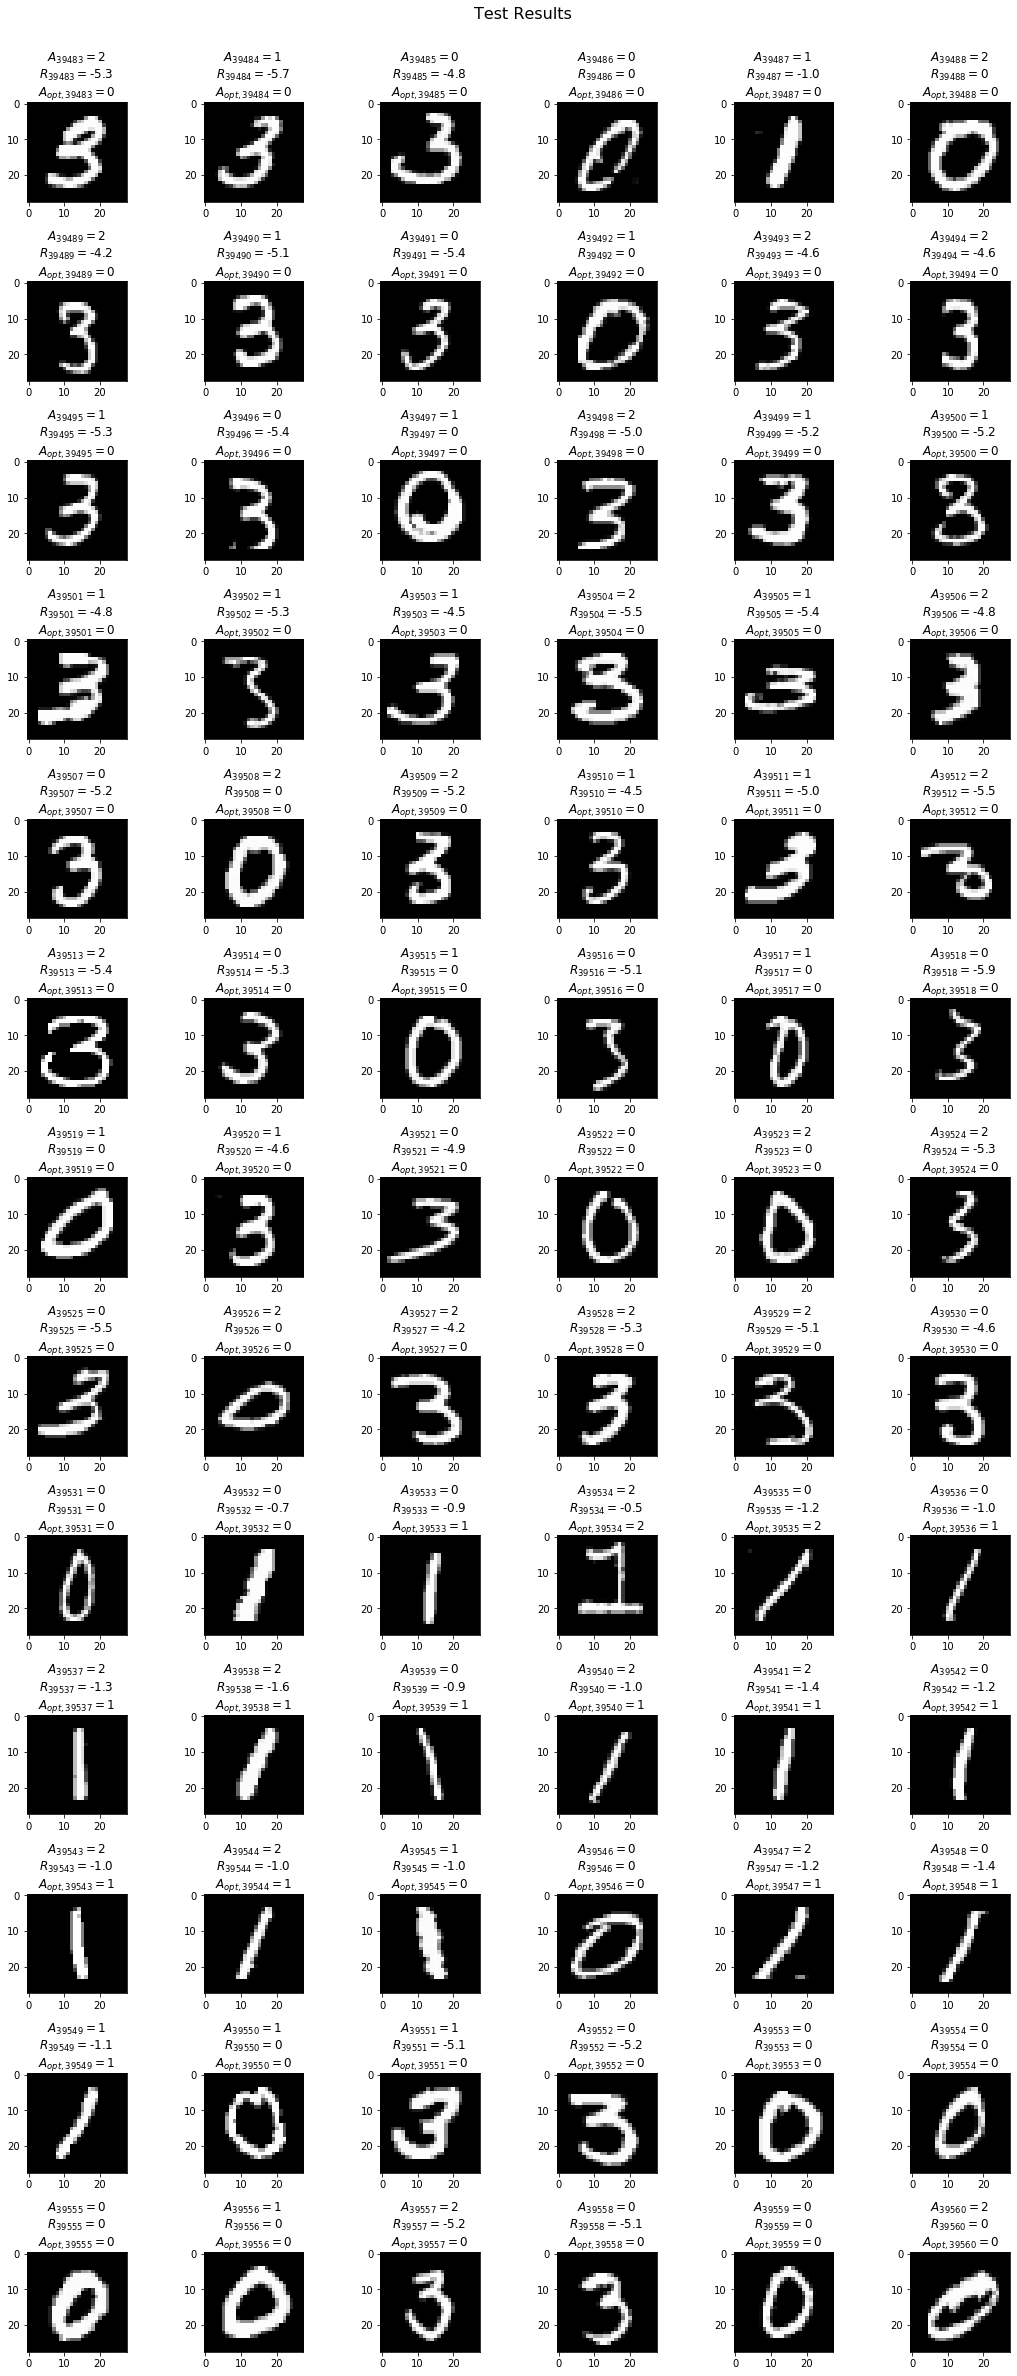

In [9]:
k = 0

fig = plt.figure(figsize = (15, 2.5*13))
fig.suptitle('Test Results', y = 1.014, size = 16)


for t in range(39483, 39483+6*13):
    k += 1
    plt.subplot(13, 6, k)
    plt.tight_layout()
    plt.imshow(images[t], cmap= 'gray', interpolation = 'none')
    
    A = actions[t]
    R = round(rewards[t], 1)
    opt_A = round(optimal_action[t],0)
    
    plt.title("$A_{{{}}}=${} \n$R_{{{}}}=${} \n$A_{{opt,{}}}=${}".format(
    t, A, t, R, t, opt_A))

plt.show()

----
---
---

### Convolutional NN

In [10]:
# Attempt was made.


# Hyper-parameters
BATCH_SIZE = 128
INPUT_SHAPE = (28,28,)
KERNEL_SIZE = 4
FILTER_SIZE = 4 
# ---------

model = models.Sequential()
model.add(layers.Conv2D(FILTER_SIZE, 
                        KERNEL_SIZE, 
                        activation = 'relu', 
                        input_shape = INPUT_SHAPE))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(4, (5, 5), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
          
model.summary()

ValueError: Input 0 of layer conv2d is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 787]

In [ ]:
for k in range(2):#n_chunks):
    # images, actions, rewards
    
    times = np.arange(chunk_size*k, chunk_size*(k+1))
    print("\nCurrent time t = {}".format(times[0]))
    print(images[times].shape)
    q = model.predict(np.array((images[times], np.array(actions)[times])))
    print(q)
    #q1 = model.predict((images[times+1]))
    #q_opt= np.max(np.concatenate((q1), axis=1), axis=1)
    #target= np.array(rewards)[times] + gamma*q_opt
    
    
    #history = model.fit(images[times], target, batch_size = BATCH_SIZE, epochs = 2, verbose=1)